In [1]:
import os
import pandas as pd
import numpy as np
import langdetect

In [2]:
# Get the path to the folder containing the Excel files
excel_folder_path = "../raw/Qatar_Embassies_in_World_Cup_Countries"

# Create a list of all the Excel files in the folder
excel_files = []
for file in os.listdir(excel_folder_path):
    if file.endswith(".xlsx"):
        excel_files.append(file)

In [3]:
# Create a dictionary to store the results
results = {}
all_qatar_embassies_df = pd.DataFrame()

# Helper function to catch errors
def detect_language(text):
    try:
        return langdetect.detect(text)
    except:
        return "undetected"

# Loop over all of the Excel files
for excel_file in excel_files:
    # Read the Excel file into a Pandas DataFrame
    df = pd.read_excel(excel_folder_path + "/" + excel_file)
    
    # Get the total number of tweets
    total_tweets = df.shape[0]

    # Get the total number of original tweets
    # If RTed column is empty then it is an original tweet
    original_tweets = df[df["RTed"].isna()].shape[0]

    # Get the total number of retweets
    retweets = total_tweets - original_tweets

    # Get unique date (not time) values from the created_at column
    # Convert the created_at column to datetime format
    df["created_at"] = pd.to_datetime(df["created_at"])
    # Get the unique date values
    unique_dates = df["created_at"].dt.date.unique()
    # Convert the unique_dates to strings
    unique_dates = unique_dates.astype(str)


    # Apply langdetect.detect() to each text in the df['text'] column and write the result to the df['languages'] column if it exists, if value does not exist then write "undetected"
    df['languages'] = df['text'].apply(lambda x: detect_language(x) if x else "undetected")
    # Refer to this page to get the list of ISO 639-1 codes:https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

    # For each text in the df['text'] column if the text contains '#' then split the words and get the first word which is the hashtag
    df['hashtags'] = df['text'].apply(lambda x: x.split()[0] if x and '#' in x else np.nan)    

    # Convert specified columns to string dtype
    columns_to_convert = ['media1', 'media2', 'media3', 'media4']
    df[columns_to_convert] = df[columns_to_convert].astype(str)

    # Check if media URLs start with 'https://pbg' and create corresponding columns
    has_image_columns = ['hasImage1', 'hasImage2', 'hasImage3', 'hasImage4']
    df[has_image_columns] = df[columns_to_convert].apply(lambda x: x.str.contains('jpg')).fillna(False)

    # Check if media URLs start with 'https://video' and create corresponding columns
    has_video_columns = ['hasVideo1', 'hasVideo2', 'hasVideo3', 'hasVideo4']
    df[has_video_columns] = df[columns_to_convert].apply(lambda x: x.str.contains('mp4')).fillna(False)

    # Create 'hasImage' column by checking if any of the 'hasImage' columns are True
    df['hasImage'] = df[has_image_columns].any(axis=1)

    # Create 'hasVideo' column by checking if any of the 'hasVideo' columns are True
    df['hasVideo'] = df[has_video_columns].any(axis=1)

    # Get country from excel_file name
    start = excel_file.find(' in ') + 4
    end = excel_file.find('-', start)
    country = excel_file[start:end]
    
    # Add the results to the dictionary
    results[country] = {
        "total_tweets": total_tweets,
        "original_tweets": original_tweets,
        "retweets": retweets,
        "unique_dates": unique_dates,
        "languages": df['languages'].unique(), 
        "hashtags": df['hashtags'].unique(),
        "hasImages": df[df['hasImage'] == True].shape[0],
        "hasVideos": df[df['hasVideo'] == True].shape[0],
    }

    # Concatenate the DataFrame to the all_data DataFrame
    all_qatar_embassies_df = pd.concat([all_qatar_embassies_df, df], ignore_index=True)

    
# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

In [4]:
df_results

,Germany,Senegal,ar Embassy Mexico,USA,Morocco,France,Canada,Brazil,Portugal,ar Embassy Tokyo,...,UK,Tunisia,Belgium,SKorea,Netherlands,Spain,Uruguay,Australia,Costa Rica,Argentina
total_tweets,36,4,20,119,50,21,115,1643,30,139,...,36,345,248,67,69,292,570,193,22,18
original_tweets,23,1,12,80,21,21,37,8,8,81,...,21,24,14,22,36,97,37,8,21,13
retweets,13,3,8,39,29,0,78,1635,22,58,...,15,321,234,45,33,195,533,185,1,5
unique_dates,"[2022-12-25, 2022-12-20, 2022-12-18, 2022-12-0...",[2022-10-01],"[2022-12-31, 2022-12-28, 2022-12-19, 2022-12-1...","[2022-12-31, 2022-12-28, 2022-12-25, 2022-12-2...","[2022-12-22, 2022-12-18, 2022-12-10, 2022-12-0...","[2022-12-18, 2022-12-14, 2022-11-17, 2022-11-1...","[2022-12-20, 2022-12-19, 2022-12-18, 2022-12-1...","[2022-12-30, 2022-12-29, 2022-12-28, 2022-12-2...","[2022-12-21, 2022-12-18, 2022-11-21, 2022-11-1...","[2023-03-23, 2023-03-20, 2023-03-17, 2023-03-0...",...,"[2022-12-21, 2022-12-20, 2022-12-18, 2022-12-0...","[2022-12-30, 2022-12-28, 2022-12-26, 2022-12-2...","[2022-12-21, 2022-12-18, 2022-12-17, 2022-12-1...","[2022-12-31, 2022-12-26, 2022-12-19, 2022-12-1...","[2022-12-29, 2022-12-21, 2022-12-20, 2022-12-1...","[2022-12-21, 2022-12-19, 2022-12-18, 2022-12-1...","[2022-12-30, 2022-12-28, 2022-12-26, 2022-12-2...","[2022-12-31, 2022-12-29, 2022-12-27, 2022-12-2...","[2022-12-19, 2022-11-30, 2022-11-24, 2022-11-2...","[2022-12-22, 2022-11-10, 2022-11-09, 2022-11-0..."
languages,"[ar, de, en]",[ar],"[ar, ca, es, so, id]","[en, ar, undetected, af]","[ar, undetected, en]","[fr, so, ar]","[en, ar, it, af, fr]","[ar, es, en, fr, de, id, undetected, ca, tr, p...","[en, ar, pt]","[en, ar, ja, de, id, pt, fr]",...,"[en, undetected]","[ar, es, fr, en, so, undetected]","[ar, en, fr, undetected, nl, tr, id, ca, es]","[ar, undetected, en, ko, ca, id]","[ar, so, en, undetected]","[ar, es, en, undetected, pt, hu, fa, ca, id, et]","[es, en, ar, undetected, ca, so, tr, de, fr]","[en, ar, de, undetected]","[ar, es, en]","[ca, ar, es, undetected, en]"
hashtags,"[nan, فعاليات, شكرا, احتفلت, مبروك, جانب, اجوا...","[رئيس, بيان, nan]","[La, #qatar2022, Así, nan, سفارة, Hoy, Viví, ▶...","[As, nan, The, Wishing, During, Hard, Human, A...","[nan, رفعتم, نفخر, ألف, انضمام, أجواء, حضرة, أ...","[""Notre, nan, ""Je, #ConférenceUkraine, L'ambas...","[nan, Sheikh, What, The, Qatar's, We, Inspired...","[nan, Qatar, Statement, بيان, رأيتُ, Spokesper...","[1.4, سفارة, This, HH, HE, كلمة, The, We, nan,...","[The, تهنئكم, nan, أبرز, 駐日カタール国大使館は、天皇陛下の63歳の...",...,"[nan, ARGENTINA, We, 𝐇𝐈𝐒𝐓𝐎𝐑𝐘, The, Happy, Hist...","[المتحدث, بيان, nan, تحولت, بيان|, دولة, أتقدم...","[nan, تمكنت, Through, The, تنتهي, أهنئ, Qatar,...","[nan, سفارة, احتفال, Al, During, خيمتنا, نائب,...","[nan, 🇦🇷Amb, وفد, أهنئ, انتخاب, Qatar, سررت, ب...","[سفارة, nan, #Our_Unity_Source_of_Our_Strength...","[Qatar, Statement, بيان, nan, بيان|, نائب, Dep...","[Statement, Spokesperson, Assistant, Deputy, M...","[nan, Statement, El]","[nan, #قنا_فيديو, As]"
hasImages,20,4,7,42,38,12,66,1305,14,108,...,15,251,168,43,55,187,443,169,22,12
hasVideos,12,0,6,5,8,1,14,140,13,11,...,5,62,39,12,2,91,64,11,0,6


In [5]:
# Set id column as index 
all_qatar_embassies_df.set_index('id', inplace=True)

In [6]:
all_qatar_embassies_df.head()

,screen_name,created_at,fav,rt,RTed,text,media1,media2,media3,media4,...,hasImage1,hasImage2,hasImage3,hasImage4,hasVideo1,hasVideo2,hasVideo3,hasVideo4,hasImage,hasVideo
id,,,,,,,,,,,,,,,,,,,,,
1607131065281576960,QatarEmb_Berlin,2022-12-25 21:47:59,3,1,NaN,صور من فعاليات اليوم الختامي لفعاليات منطقة ال...,http://pbs.twimg.com/media/Fk2tKvaWYAApohc.jpg,http://pbs.twimg.com/media/Fk2tKvYWAAE0bBL.jpg,http://pbs.twimg.com/media/Fk2tKvaXEAAJhbv.jpg,http://pbs.twimg.com/media/Fk2tKvYXkAI0247.jpg,...,True,True,True,True,False,False,False,False,True,False
1607085843545722880,QatarEmb_Berlin,2022-12-25 18:48:17,2,1,NaN,فعاليات اليوم الختامي لمنطقة المشجعين والتي شه...,https://video.twimg.com/ext_tw_video/160708546...,nan,nan,nan,...,False,False,False,False,True,False,False,False,False,True
1605012413446856704,QatarEmb_Berlin,2022-12-20 01:29:13,0,4,NajeebAlbader,شكرا سعادة سفير دولة #قطر الشقيقة @Amb_AMSAlTh...,http://pbs.twimg.com/media/FkSe8moWYAAf_o8.jpg,nan,nan,nan,...,True,False,False,False,False,False,False,False,True,False
1604434003397836801,QatarEmb_Berlin,2022-12-18 11:10:50,3,1,NaN,احتفلت سفارة دولة قطر في برلين باليوم الوطني، ...,nan,nan,nan,nan,...,False,False,False,False,False,False,False,False,False,False
1604433844660146176,QatarEmb_Berlin,2022-12-18 11:10:12,11,5,NaN,Die Botschaft des Staates Katar in Berlin feie...,https://video.twimg.com/ext_tw_video/160443355...,nan,nan,nan,...,False,False,False,False,True,False,False,False,False,True


In [7]:
# Export df_results as an excel file 
df_results.to_excel('../interim/qatar_embassies_stats.xlsx')
all_qatar_embassies_df.to_excel('../interim/all_qatar_embassies_df.xlsx')

In [8]:
print(f"Total tweets: {all_qatar_embassies_df.shape[0]}")
print(f"Total retweets: {all_qatar_embassies_df[all_qatar_embassies_df['rt'] > 0].shape[0]}")
print(f"Total number of tweets liked at least once: {all_qatar_embassies_df[all_qatar_embassies_df['fav'] > 0].shape[0]}")

Total tweets: 4238
Total retweets: 3846
Total number of tweets liked at least once: 543


In [9]:
# Convert created_at column to datetime
all_qatar_embassies_df['created_at'] = pd.to_datetime(all_qatar_embassies_df['created_at'])
# Get the date value only from created_at column
all_qatar_embassies_df['created_at_date'] = all_qatar_embassies_df['created_at'].dt.date

all_qatar_embassies_df = all_qatar_embassies_df.sort_values(by='created_at_date') # Sort by created_at_date 

Text(0, 0.5, 'Count')

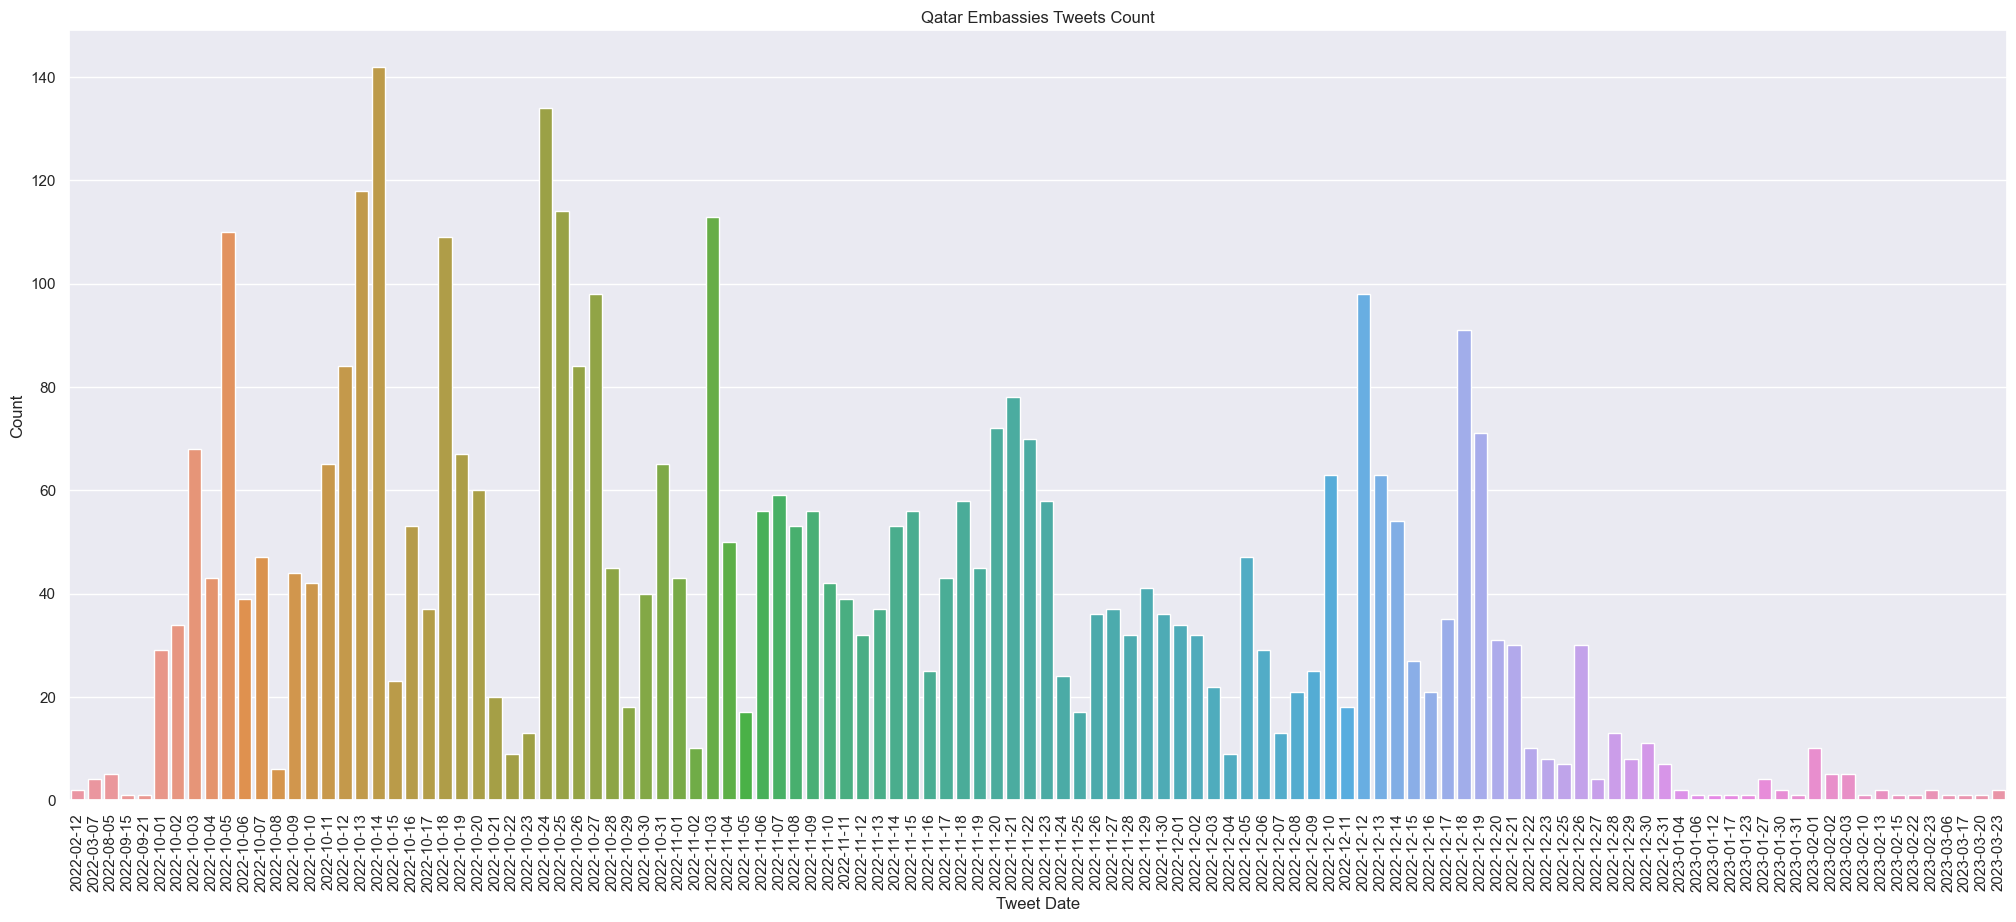

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("dark") # Setting style for seaborn plot
sns.set(rc={'figure.figsize':(25,10)}) # Setting size of plot

sns.countplot(data=all_qatar_embassies_df, x="created_at_date") # Prepare a countplot 

plt.title("Qatar Embassies Tweets Count") # Set title for plot
plt.xticks(rotation=90) # rotate the x axis labels
plt.xlabel("Tweet Date") # set x-axis label
plt.ylabel("Count") # set y-axis label